# Data Science and Visualization (RUC F2024)

## Miniproject Report

## Remarks:

1. This template serves as a guideline for structuring your miniproject report. You're supposed to follow the provided sections overall, but you're allowed to make changes or adjustments whenever it's appropriate for your particular project. 

    * For example, in each section provided below, you may use many cells instead of just one. 

    * You may also add subsections if you want. If necessary, you can also add or remove sections.


2. You should rename this notebook file to 'Group_xxx_report.ipynb' where 'xxx' is your group number in our [padlet] (https://padlet.com/luhua/dsv-f24-mini-project-group-formation-6rhpxxi0tamun2ip). This notebook should be submitted to Digital Exam in time.

3. Make sure the data you use is available somewhere and accessible to the examiner and censor. You may upload your data together with this report to Digital Exam, or put it online and provide the URL to it in this report. It's your own responsibility to ensure the data accessibility. 

4. Any text in '[ ]' throughout the template should be replaced by appropriate content that you're supposed to generate. Also remember to remove the pairs of '[' and ']' in the final report. 

5. Give sufficient descriptive and explanative information by using Markdown cells and/or comments in Python code.

6. Remove this cell in the final report.

7. If you have questions, please email to luhua@ruc.dk.

## Project Title: [Decide a good title for your project and write it here]

## Group Members:
* Mustafa Berkan Yikilmaz, Computer Science, 2024, stud-mby@ruc.dk
* Kaoutar Mesbahi, Bioprocess Science, 2024, stud-mesbahi@ruc.dk
* Berkin Kagan Ates, Computer Science, 2024, stud-berkin@ruc.dk

## Abstract

[Here, you need to write ~5 sentences to describe the main points of your project, including but not limited to, dataset, research questions, data science methods, findings from the data, your condlusions and remarks.]

## 0. Setup and Data

Import the modules needed for the project.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculati

### Data description:
We found this data in a website named Kaggle. We reckon that this data might be proper for predicting to future data and execute all topics we covered during the classes.

The heart attack datasets were gathered from January to May 2019 at the Zheen Hospital in Erbil, Iraq. This dataset contains the following attributes: blood sugar, ck-mb, age, gender, heart rate, systolic and diastolic blood pressure, and troponin with positive or negative output. Depending on the information supplied, the medical dataset categorises heart attacks as either none or one. The data's gender column is normalised, with 1 representing male and 0 representing female. If it exceeds 120, the glucose column is set to 1; if not, it is set to 0. Positive is set to 1 and adverse to 0 in the output.

## 1. Loading the Data

[Below you should load the data, display a part of the data, show the shape (number of rows and that of columns) of the data, and show the statistics of the data.]

In [5]:
data = pd.read_csv('Medicaldataset.csv')

data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


Age: Age of the patient (integer).

Gender: Gender of the patient, encoded as integers (likely 1 for male and 0 for female).

Heart rate: Heart rate of the patient (integer).

Systolic blood pressure: Top number in a blood pressure reading (integer).

Diastolic blood pressure: Bottom number in a blood pressure reading (integer).

Blood sugar: Blood sugar levels (float).

CK-MB: Creatine kinase MB, an enzyme found in the heart muscle (float).

Troponin: A group of proteins that help regulate the contraction of the heart muscle (float).

Result: The outcome for the patient ('positive' or 'negative' for heart issues).

In [80]:
# Displaying the last part of our data
data.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [69]:
data.shape

(1319, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [81]:
data.describe(include = 'all')

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN


As it can be seen above, patients' ages range between 14 to 103, with the mean of around 56.193328. 

Extremities:

In [46]:
data['Heart rate'].nlargest(10)

63      1111
717     1111
1069    1111
21       135
682      135
1012     135
346      134
842      134
1213     134
457      132
Name: Heart rate, dtype: int64

In [66]:
data['CK-MB'].nlargest(50)

7       300.00
28      300.00
82      300.00
97      300.00
103     300.00
185     300.00
393     300.00
451     300.00
472     300.00
651     300.00
732     300.00
741     300.00
924     300.00
997     300.00
1047    300.00
1209    300.00
1215    300.00
1259    300.00
1280    300.00
677     297.50
187     286.90
445     266.30
144     264.40
1249    261.00
607     259.70
682     254.40
794     251.40
972     247.80
706     217.50
920     208.60
429     207.50
809     201.70
806     190.70
427     185.10
783     177.90
101     165.10
435     165.00
617     147.40
808     144.90
530     142.60
239     134.70
946     111.00
878     107.30
328     104.30
236     101.90
1151     99.62
277      99.56
221      98.48
114      96.08
509      96.08
Name: CK-MB, dtype: float64

In [55]:
data['Troponin'].nlargest(15)

988     10.30
29      10.00
753     10.00
1003    10.00
1028    10.00
1048    10.00
1094    10.00
1252    10.00
1310    10.00
475      9.11
30       8.30
113      7.67
89       6.05
935      6.01
796      5.87
Name: Troponin, dtype: float64

In the dataset, 509 patients are negative while 810 of them are positive:

In [36]:
data.groupby('Result').size()

Result
negative    509
positive    810
dtype: int64

## 2. Data Preprocessing

[Below you should handle the missing values, convert data types, apply data scaling and so on, if any of them is needed.]

There is no missing value in the data. Therefore, there is no need to do preprocessing to handle missing values.

In [83]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [61]:
data.isna().any()

Age                         False
Gender                      False
Heart rate                  False
Systolic blood pressure     False
Diastolic blood pressure    False
Blood sugar                 False
CK-MB                       False
Troponin                    False
Result                      False
dtype: bool

## 3. Exploratory Data Analysis

[Below you can conduct EDA of your data, e.g., ask some questions and try to answer them by accessing the data properly and making some visualizations.]

**2. Distribution Analysis** 
Examine the distribution of various features:

Histograms for continuous data like age, blood pressure, CK-MB, Troponin, and blood sugar to understand their distribution.
Box plots to identify outliers and the spread of these measurements.

**3. Correlation Analysis**
Identify relationships between variables:

Correlation matrix and heatmap to see how variables are related, e.g., how heart rate correlates with blood pressure or blood sugar levels.
Investigate whether higher values of biomarkers like CK-MB and Troponin correlate with positive heart attack results.

**4. Comparative Analysis**
Compare different subgroups within the data:

Bar charts or pie charts to compare the number of positive vs. negative heart attack cases.
Use groupby operations to explore differences in health metrics between different ages, genders, or results (positive/negative).
Violin plots to compare the distribution of blood pressure or heart rates across different results.

**5. Time Series Analysis (if applicable)**
If the data includes time-related information:

Analyze trends over time in heart rate or blood sugar measurements.

**6. Pair Plots**
Visualize relationships between all variables to see direct comparisons:

Pair plots can help in visualizing the relationship across multiple variables at once.

**7. Anomaly Detection**
Look for unusual patterns or outliers that might indicate errors or rare events:

Analyze unusual values in heart rate, like the 1111 bpm case, to see if they are errors or require special attention.

When we group patients by their results, we see that their agem systoluc and diastolic blood pressures as well as blood sugar levels are very similar. However, CK-MB and Troponin levels of positive cases are very high compared to negatives.

In [71]:
data.groupby('Result').mean()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Result,,,,,,,,
negative,52.100196,0.603143,77.886051,127.856582,72.440079,149.757760,2.555344,0.026988
positive,58.765432,0.695062,78.619753,126.739506,72.161728,144.671605,23.266838,0.570798


Text(0, 0.5, '# of cases')

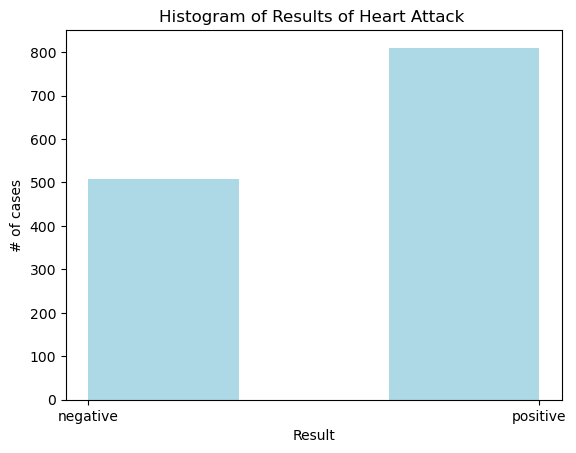

In [84]:
#1. To see how many cases had a heart attack and how many didn't

plt.hist(data.Result, bins=3, color='lightblue')
plt.title('Histogram of Results of Heart Attack ')

plt.xlabel('Result')
plt.ylabel('# of cases')


Question: How are positive results distributed among different genders?

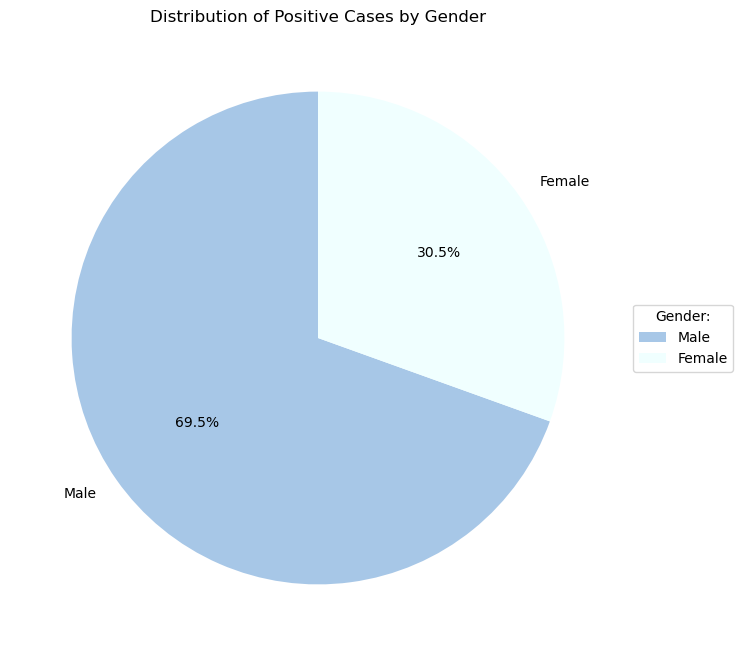

In [85]:
# Filter the data for positive cases
positive_cases = data[data['Result'] == 'positive']

# Count the number of male and female cases among positive cases
male_positive_cases = positive_cases[positive_cases['Gender'] == 1]
female_positive_cases = positive_cases[positive_cases['Gender'] == 0]
# Count the number of positive cases for each gender
male_count = len(male_positive_cases)
female_count = len(female_positive_cases)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['#A7C7E7', '#F0FFFF'])
plt.title('Distribution of Positive Cases by Gender')
plt.legend(title= "Gender:", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

Question: Is there a correlation between CK-MB, Troponin with Heart Attack Result?

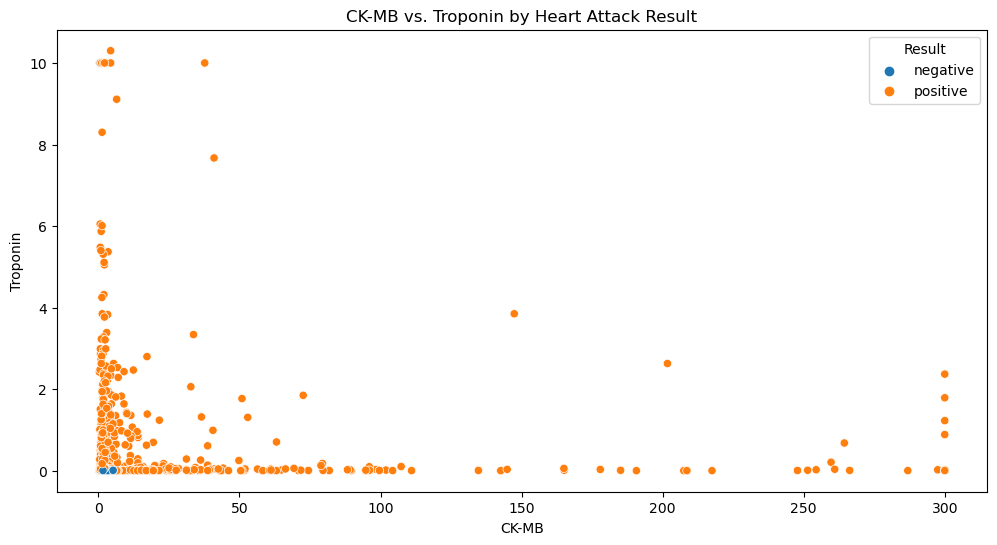

In [74]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CK-MB', y='Troponin', hue='Result', data=data)
plt.title('CK-MB vs. Troponin by Heart Attack Result')
plt.xlabel('CK-MB')
plt.ylabel('Troponin')
plt.legend(title='Result')
plt.show()

Question: What age group is most susceptible to experiencing a heart attack?

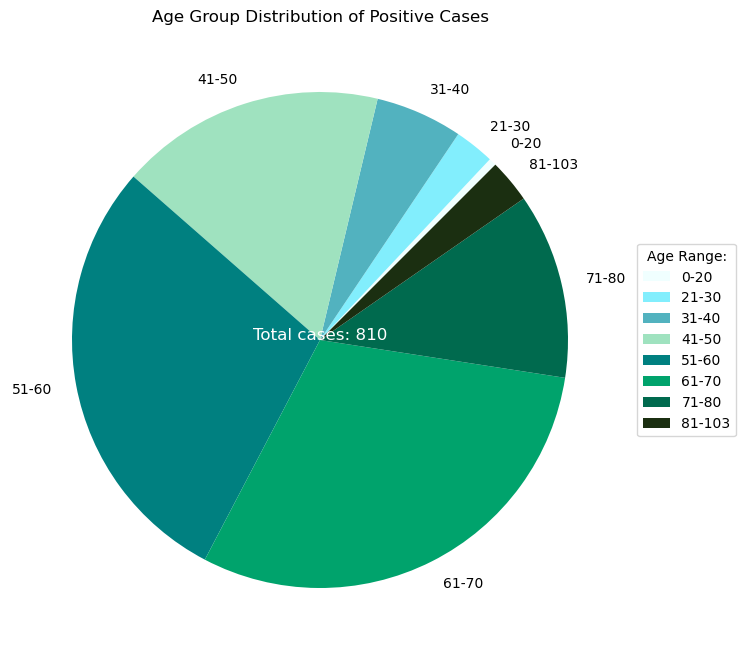

In [86]:
# Color choice
custom_colors = ['#F0FFFF','#82EEFD', '#52B2BF',  '#9FE2BF','#008080', '#00A36C','#006A4E' ,'#1B2F11']

# We filtered the data to include only rows where the result is 'positive'
positive_cases = data[data['Result'] == 'positive']

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 103]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-103']
age_groups = pd.cut(positive_cases['Age'], bins=age_bins, labels=age_labels)

# Count the occurrences of each age group
age_group_counts = age_groups.value_counts()

# Sort the age groups
age_group_counts_sorted = age_group_counts.sort_index()

# Plotting a pie chart
plt.figure(figsize=(8, 12))
plt.pie(age_group_counts_sorted, labels=age_group_counts_sorted.index,startangle=45, labeldistance=1.1, colors=custom_colors)
plt.title('Age Group Distribution of Positive Cases')

# Add the total number of cases inside the pie chart
total_cases = len(positive_cases)
plt.text(0, 0, f'Total cases: {total_cases}', fontsize=12,color='white', ha='center')

# Making the legend
plt.legend(title= "Age Range:", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

## 4. Data Modelling

[Below you apply machine learning models and other data science methods to your data, e.g., classification, regression, clustering, and association rule mining. You should do at least one of them. Give a description of what you do here.]

### 4.1. Feature Selection

[Decide which features you want to use and obtain them properly from the original data.]

### 4.2 Model Construction and Validation

[Construct the model and validate the model design if necessary.]

### 4.3 Model Application and Performance Evaluation

[Apply the model and evaluate its performance]

### 4.4 Visualize and Analyze Your Results/Findings from Data Modelling

[Here you may visualize the modeling results, and/or analyze/interprete its meanings.]

## 5. Conclusion and Discussion

[Here you may draw your conclusion based on the previous sections, and discuss the pros and cons of the project, and propose something for future work.]